This is a Jupyter Notebook. Formerly an IPython Notebook. It is a good way to document workflows. You can have Python, R, Fortran, etc notebooks. Today we are using a Python kernel to do some cool stuff with Geoscience data. The following cell is your first Python code

In [18]:
2+4*10

42

In [9]:
#This is a comment. This is for a human to read (so you remember what your code does!)
#Python ignores anything behind the '#'.

#The next line is an example of a 'variable'. Assign values using a single '=' sign.
time=145

In [19]:
#Now you can use that variable in different ways.... firstly print it out to the screen
print("The age of the sample is", time, " Million years")

The age of the sample is 145  Million years


In [39]:
#Make a new variable called 'endtime' and add a constant to our 'time' variable
endtime=time+56

In [40]:
#Nothing printed out above? Good. Jupyter Notebooks won't always do that so let's tell Python to print it.
print(endtime)

201


In [41]:
#Make a new 'string' variable
geological_age='Jurassic'

#Print out some useful information that includes our different variables
print("My sample is ", endtime, " Million years old from the", geological_age, " age.")

My sample is  201  Million years old from the Jurassic  age.


In [84]:
times=[1,4,5,geological_age]

print(times)

[1, 4, 5, 'Jurassic']


## Loading data

In [52]:
#First we have to load some modules to do the work for us.
#Modules are packages people have written so we do not have to re-invent everything!

#The first is NUMerical PYthon. A very popular matrix, math, array and data manipulation library.
import numpy

#Pandas is a module that is great for dealing with tables of data
import pandas

#This is a library for making figures (orignally based off Matlab plotting routines)
#We use  this alias 'plt' because we don't want to type out the whole name everytime we reference it!
import matplotlib.pyplot as plt 

In [46]:
#Set the variable name for the file we are loading in. 
#It is in the 'data' directory, and the file is called EarthQuery.txt

filename = '../EarthChemCU.txt'
#filename = '../data/EarthQuery.txt'

#Now read in the data

chemdata=numpy.loadtxt(filename, delimiter=',')
#chemdata <- the name of a variable we are making that will hold the table of data
#filename <- this is the name of the variable we declared above

#chemdata=pandas.read_csv(filename, sep='\t')
#chemdata <- the name of a variable we are making that will hold the table of data
#pandas.read_csv <- name of the function we are using from the pandas library
#filename <- this is the name of the variable we declared above
#sep='\t' <- We are telling pandas that the table is separated by tabs
#skipinitialspace=True <-this data has some headers we don't need to read in, so skip the first few lines.

In [78]:
#What does the data look like. Print it out
print(chemdata)

[[ 3.92583e+01 -1.14992e+02  1.11000e+02  1.96000e+04]
 [ 3.92583e+01 -1.14992e+02  1.11000e+02  1.57000e+04]
 [ 4.12060e+01 -1.17272e+02  1.05000e+02  3.00000e+00]
 ...
 [ 2.00530e+01  1.17419e+02  0.00000e+00  3.00000e+01]
 [ 2.00530e+01  1.17419e+02  0.00000e+00  3.30000e+01]
 [ 2.00530e+01  1.17419e+02  0.00000e+00  3.50000e+01]]


In [79]:
#Print the dimensions of the data
print(chemdata.shape)

(207431, 4)


In [80]:
#Print the first row
print(chemdata[0,:])

[   39.2583  -114.992    111.     19600.    ]


In [81]:
#Print the third column. Note, Python counts from 0
print(chemdata[:,2])

[111. 111. 105. ...   0.   0.   0.]


In [82]:
#Print the first two columns for row id 2, 5 and 6. 
print(chemdata[[2,5,6],0:2])

[[  41.206 -117.272]
 [  41.186 -117.417]
 [  41.177 -117.485]]


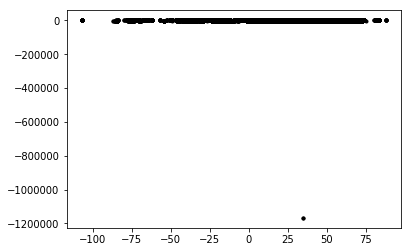

In [61]:
plt.plot(chemdata[:,0],chemdata[:,1],'k.')

In [96]:
cudata=chemdata[(chemdata[:,1]>-180).any(axis=0)]
cudata2=cudata[(cudata[:,1]<180).any(axis=0)]
print(cudata)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 4

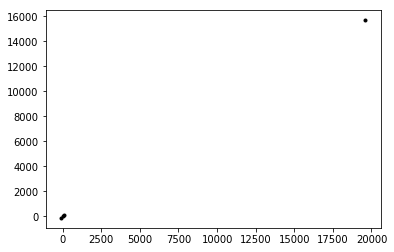

In [92]:
plt.plot(cudata[:,0],cudata[:,1],'k.')